<IPython.core.display.Javascript object>


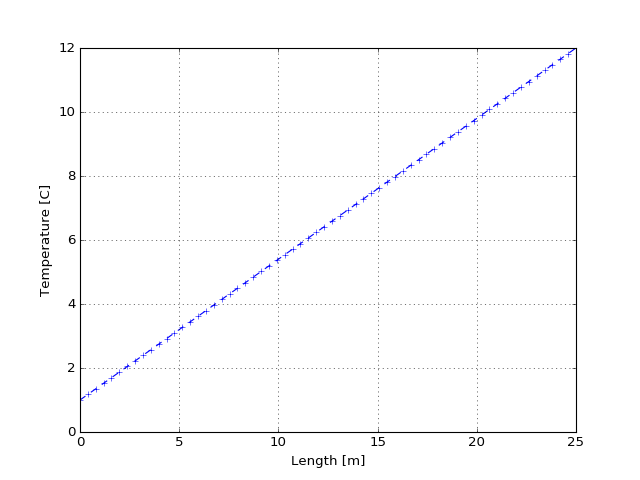

[  1.           1.17460179   1.34920358   1.52380539   1.6984072
   1.87300903   2.04761086   2.22221274   2.39681461   2.57141654
   2.74601847   2.92062046   3.09522246   3.26982453   3.4444266
   3.61902876   3.79363092   3.96823318   4.14283544   4.3174378
   4.49204017   4.66664265   4.84124514   5.01584774   5.19045035
   5.36505308   5.53965581   5.71425868   5.88886155   6.06346455
   6.23806755   6.41267069   6.58727383   6.76187711   6.93648039
   7.1110838    7.28568722   7.46029077   7.63489432   7.809498
   7.98410168   8.15870548   8.33330929   8.50791321   8.68251714
   8.85712118   9.03172522   9.20632936   9.3809335    9.55553773
   9.73014197   9.90474628  10.0793506   10.25395499  10.42855938
  10.60316383  10.77776828  10.95237278  11.12697728  11.30158181
  11.47618634  11.65079089  11.82539544  12.        ]


/home/andrei2/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [11]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot

#Physical Constants
# Init grids
#N = 26           # no of z-cells
L = 25     # pane wall thickness
#T_a = np.zeros(N)
# Initialize figure
fig = matplotlib.pyplot.figure(1)
ax = fig.add_subplot(111)
ax.grid(True)

# B Numerical method: finite difference scheme (central for space, and explicit in time)
# Numerical method parameters
nt=10000
t_end = 35000          # end time (s)
#nx = 11                # number of cells
n_plot=250             # number of points for plot analytical solution
#dx_n = L/(nx-1)       # grid size (m)
#T_ni = np.zeros(nx)   # initial conditions T=0
#T_ni[nx-1] = 0        # right boundary condition: T(x=0,t)=0
#m = 35                # number of terms for analytical method

def fdcs(T, nt, dx, end):
    """Solves the heat equation centered scheme, explicit in time  """
    dt = end/nt
    for n in range(nt):  
        Tn = T.copy() 
        T[1:-1] = (Tn[2:] + Tn[0:-2])/2
        # Enforce Neumann BC
        #T[-nx] = T[-nx+1] + ((q*dx)/k)
        #print(T)
    return T
# Convergence with analytical solution B
for nx in [64]:
    dx_n = L/(nx-1)
    T_ni = np.ones(nx)
    T_ni[0] = 1.0
    T_ni[nx-1] = 12.0
    T_n = fdcs(T_ni.copy(), nt, dx_n, t_end)
    ax.plot(np.linspace(0,L,nx), T_n, '+--')#, label='Numerical,dx=' + "{:<5.3g}".format(dx_n) + \
            #%',dt=' + "{:<3.2g}".format(t_end/nt) + ',theta=' + "{:<5.4g}".format((a*t_end/nt)/(dx_n**2)))
print (T_n)    
ax.legend()
#ax.set_ylim(ax.get_ylim()[::-1]) # flip y axis
#ax.set_xlabel('Temperature [K]')
#ax.set_ylim(0, 510)
ax.set_ylabel('Temperature [C]')
ax.set_xlabel('Length [m]')
#ax.set_title('Fig 32. Temperature for analytical&numerical methods, t=' + str(t_end) + 's')
fig.show()
#fig.savefig('Figure_32.png')